In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
import seaborn as sns
import plotly.express as px


In [8]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Train(1).csv.crdownload to SalaryData_Train(1).csv (1).crdownload


In [9]:
data_train=pd.read_csv('SalaryData_Train(1).csv.crdownload')
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,43,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Husband,Asian-Pac-Islander,Male,0,0,40,Vietnam,<=50K
9555,18,State-gov,11th,7,Never-married,Other-service,Own-child,White,Male,0,0,20,United-States,<=50K
9556,54,Private,HS-grad,9,Married-civ-spouse,Other-service,Husband,White,Male,0,0,50,United-States,<=50K
9557,62,Private,HS-grad,9,Never-married,Other-service,Other-relative,Black,Female,0,0,38,United-States,<=50K


In [10]:
from google.colab import files
uploaded=files.upload()

Saving SalaryData_Test(1).csv.crdownload to SalaryData_Test(1).csv.crdownload


In [12]:
data_test=pd.read_csv('SalaryData_Test(1).csv.crdownload')
data_test

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,Private,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
1,38,Private,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
2,28,Local-gov,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
3,44,Private,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
4,34,Private,10th,6,Never-married,Other-service,Not-in-family,White,Male,0.0,0.0,30.0,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13781,38,Federal-gov,HS-grad,9,Never-married,Transport-moving,Not-in-family,White,Male,6849.0,0.0,50.0,United-States,<=50K
13782,32,Private,Bachelors,13,Never-married,Sales,Not-in-family,Asian-Pac-Islander,Male,2174.0,0.0,45.0,Taiwan,<=50K
13783,31,Local-gov,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0.0,0.0,72.0,United-States,<=50K
13784,34,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,60.0,United-States,<=50K


In [13]:
data_test.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             1
sex              1
capitalgain      1
capitalloss      1
hoursperweek     1
native           1
Salary           1
dtype: int64

In [14]:
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13786 entries, 0 to 13785
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   age            13786 non-null  int64  
 1   workclass      13786 non-null  object 
 2   education      13786 non-null  object 
 3   educationno    13786 non-null  int64  
 4   maritalstatus  13786 non-null  object 
 5   occupation     13786 non-null  object 
 6   relationship   13786 non-null  object 
 7   race           13785 non-null  object 
 8   sex            13785 non-null  object 
 9   capitalgain    13785 non-null  float64
 10  capitalloss    13785 non-null  float64
 11  hoursperweek   13785 non-null  float64
 12  native         13785 non-null  object 
 13  Salary         13785 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.5+ MB


In [17]:
data_test.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,13786.000000,13786.000000,13785.000000,13785.000000,13785.000000
mean,38.776222,10.114899,1133.311425,89.964236,40.943344
std,13.375752,2.561284,7787.545435,408.528522,12.051287
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,3770.000000,99.000000


In [18]:
data_train.isnull().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           1
Salary           1
dtype: int64

In [16]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9559 entries, 0 to 9558
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            9559 non-null   int64 
 1   workclass      9559 non-null   object
 2   education      9559 non-null   object
 3   educationno    9559 non-null   int64 
 4   maritalstatus  9559 non-null   object
 5   occupation     9559 non-null   object
 6   relationship   9559 non-null   object
 7   race           9559 non-null   object
 8   sex            9559 non-null   object
 9   capitalgain    9559 non-null   int64 
 10  capitalloss    9559 non-null   int64 
 11  hoursperweek   9559 non-null   int64 
 12  native         9558 non-null   object
 13  Salary         9558 non-null   object
dtypes: int64(5), object(9)
memory usage: 1.0+ MB


In [19]:
data_train.describe()

,age,educationno,capitalgain,capitalloss,hoursperweek
count,9559.000000,9559.000000,9559.000000,9559.000000,9559.000000
mean,38.314886,10.111309,1080.076891,87.955958,41.059420
std,13.103760,2.529747,7352.608599,399.905804,11.913461
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,2824.000000,99.000000


<Axes: xlabel='Salary', ylabel='count'>

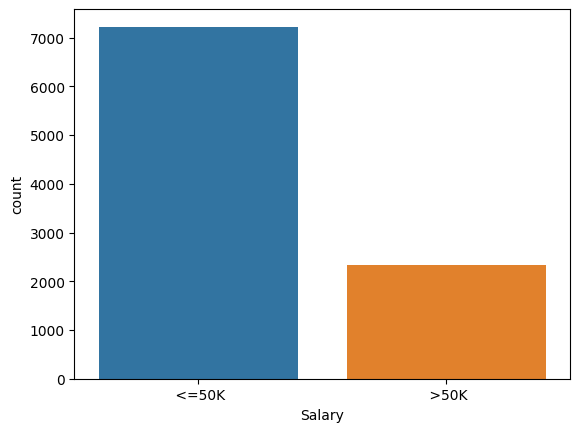

In [20]:
sns.countplot(x=data_train['Salary'])

In [21]:
le=LabelEncoder()
data_train['Salary']=le.fit_transform(data_train['Salary'])

workclass
Axes(0.125,0.11;0.775x0.77)
education
Axes(0.125,0.11;0.775x0.77)
maritalstatus
Axes(0.125,0.11;0.775x0.77)
occupation
Axes(0.125,0.11;0.775x0.77)
relationship
Axes(0.125,0.11;0.775x0.77)
race
Axes(0.125,0.11;0.775x0.77)
sex
Axes(0.125,0.11;0.775x0.77)
Salary
Axes(0.125,0.11;0.775x0.77)


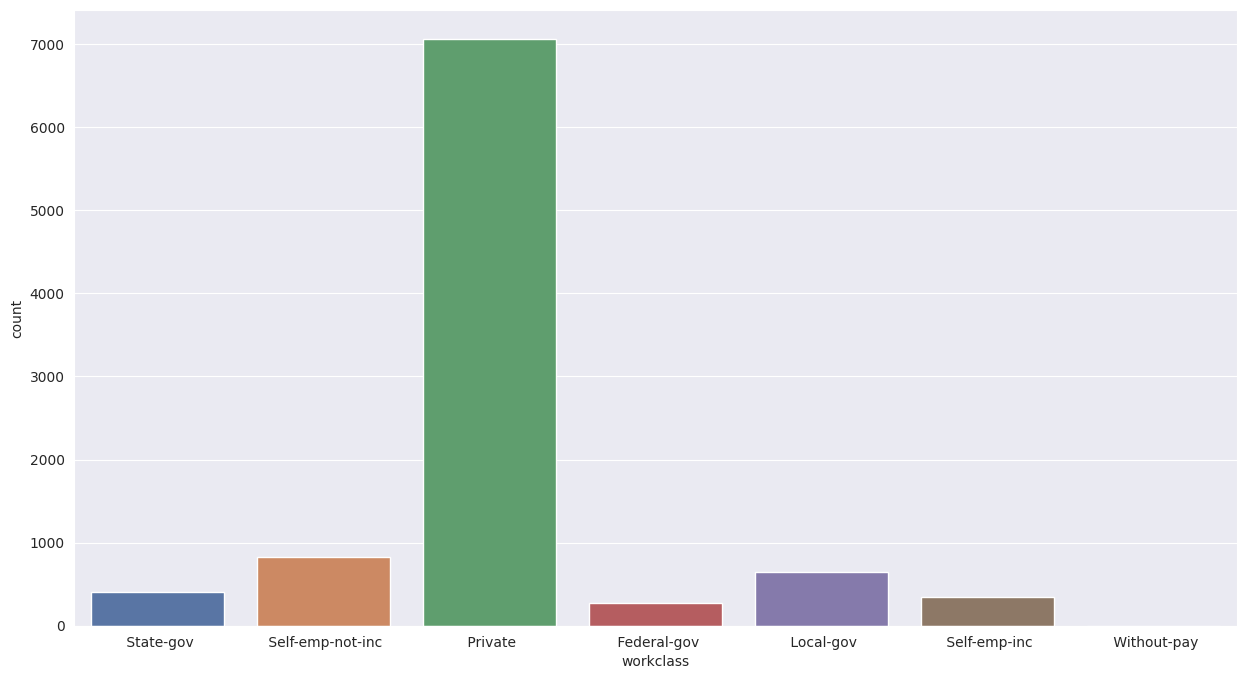

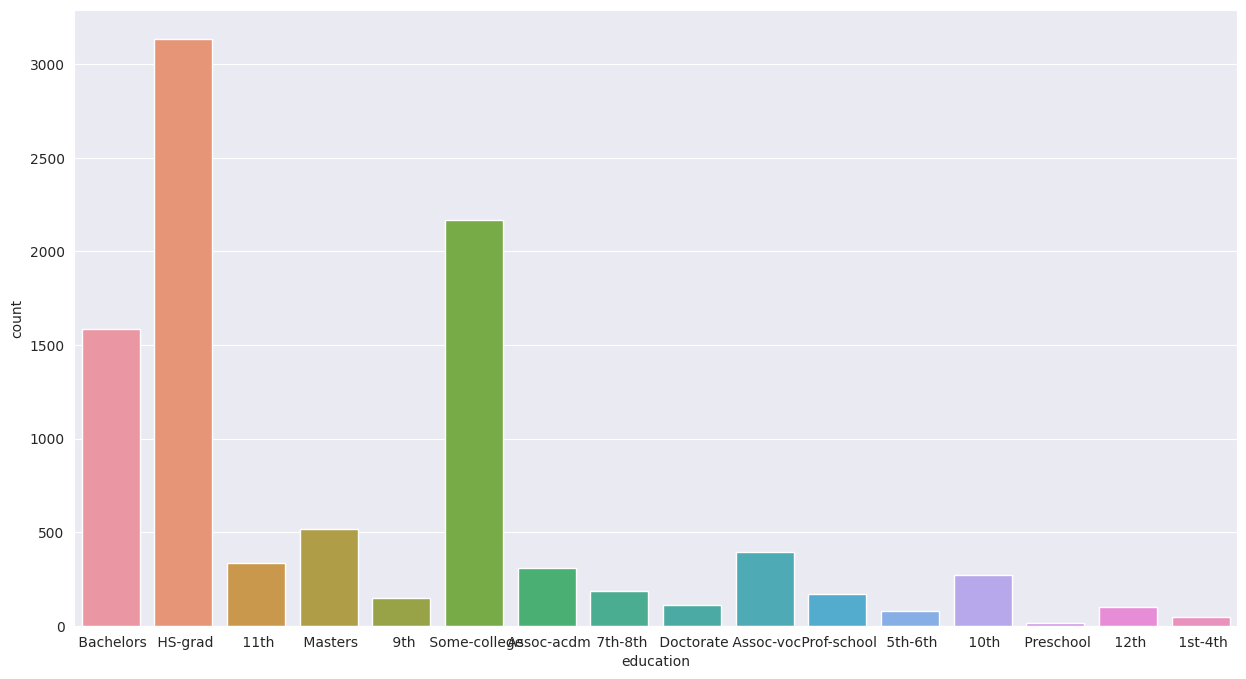

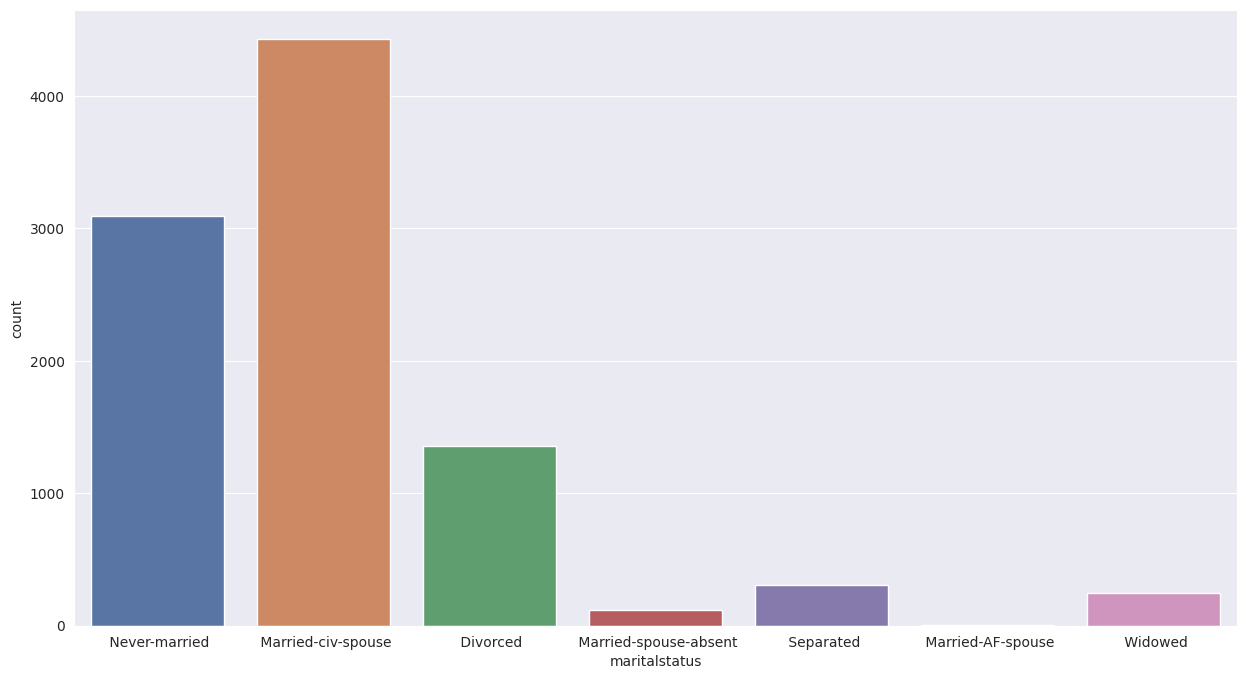

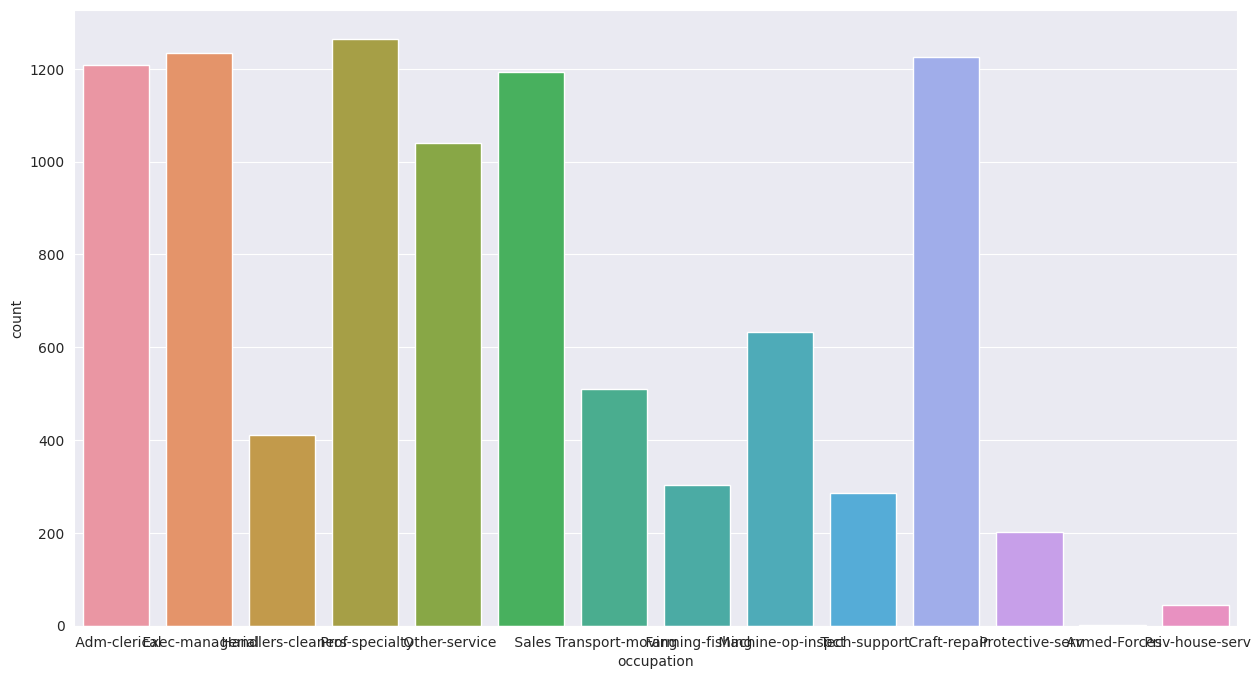

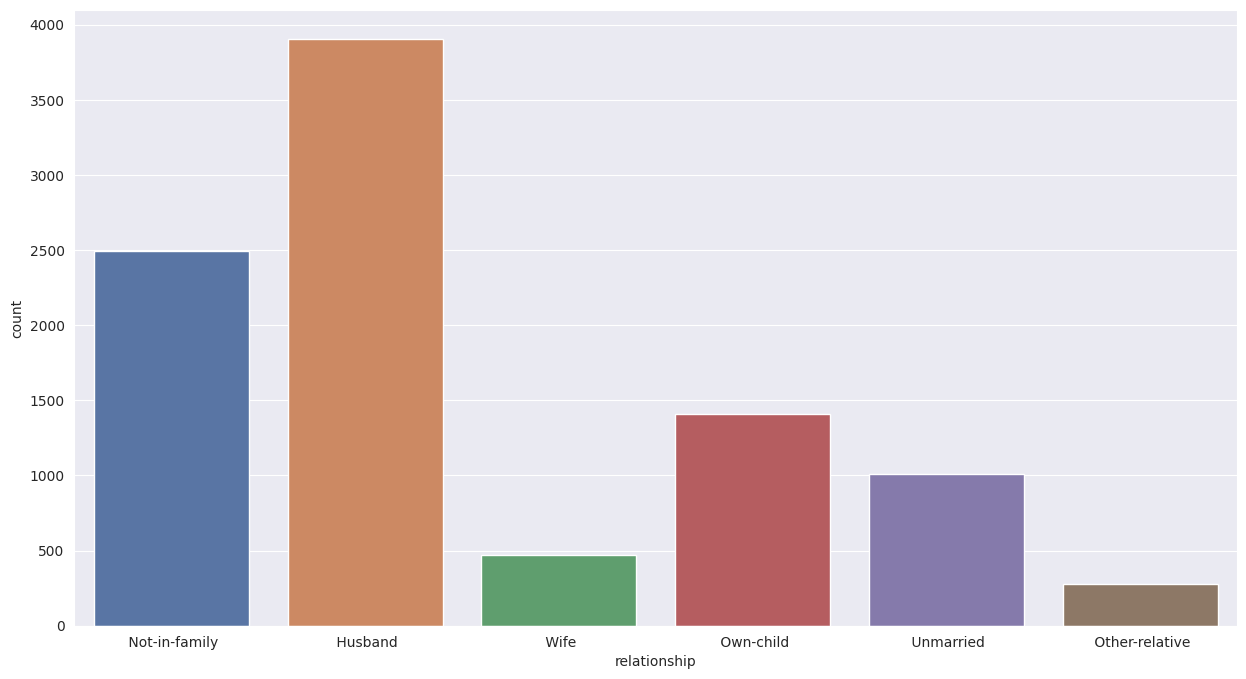

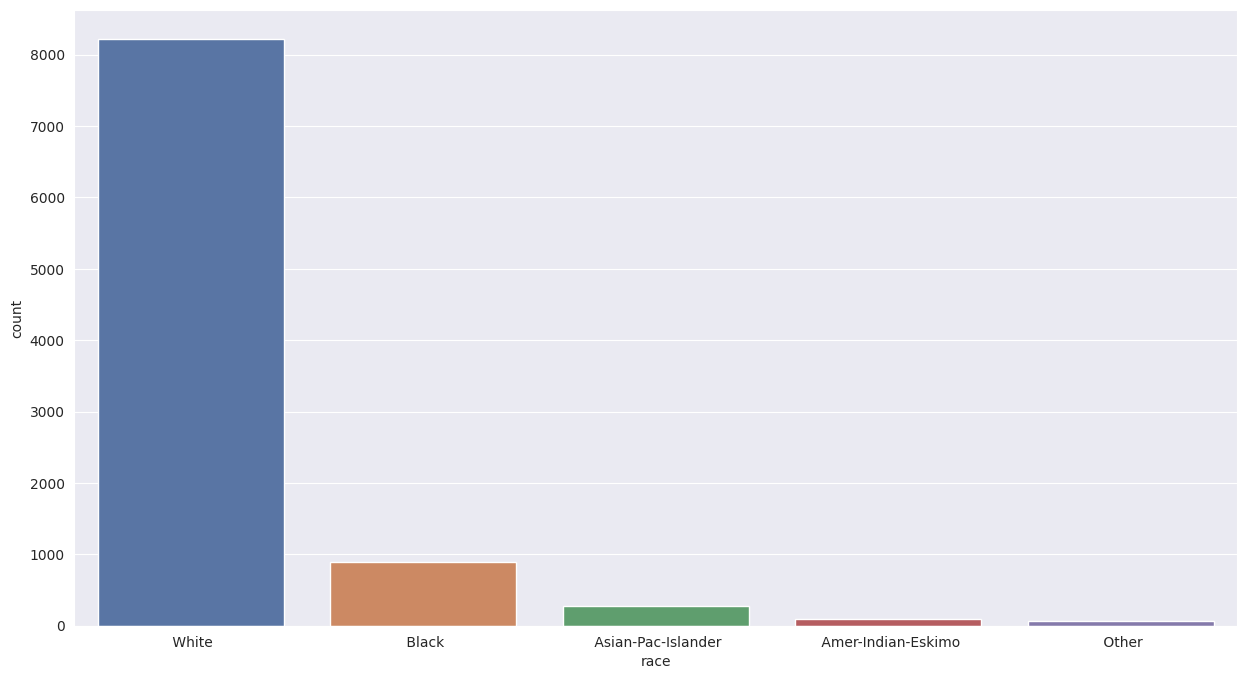

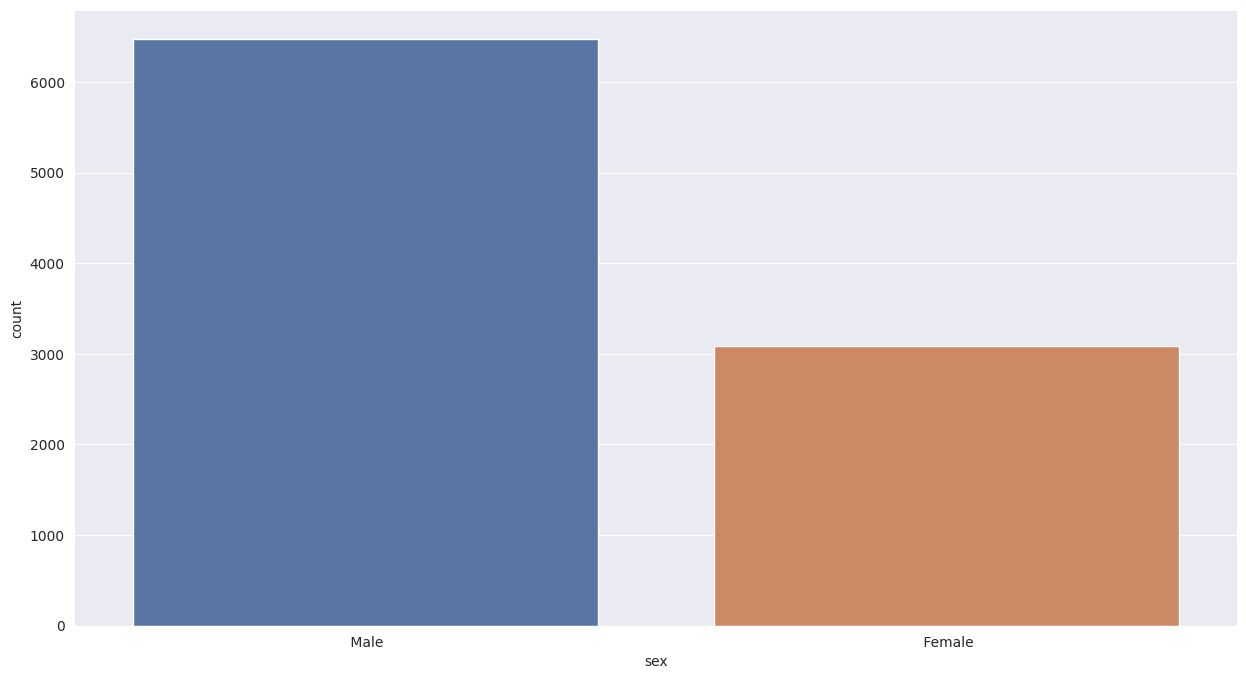

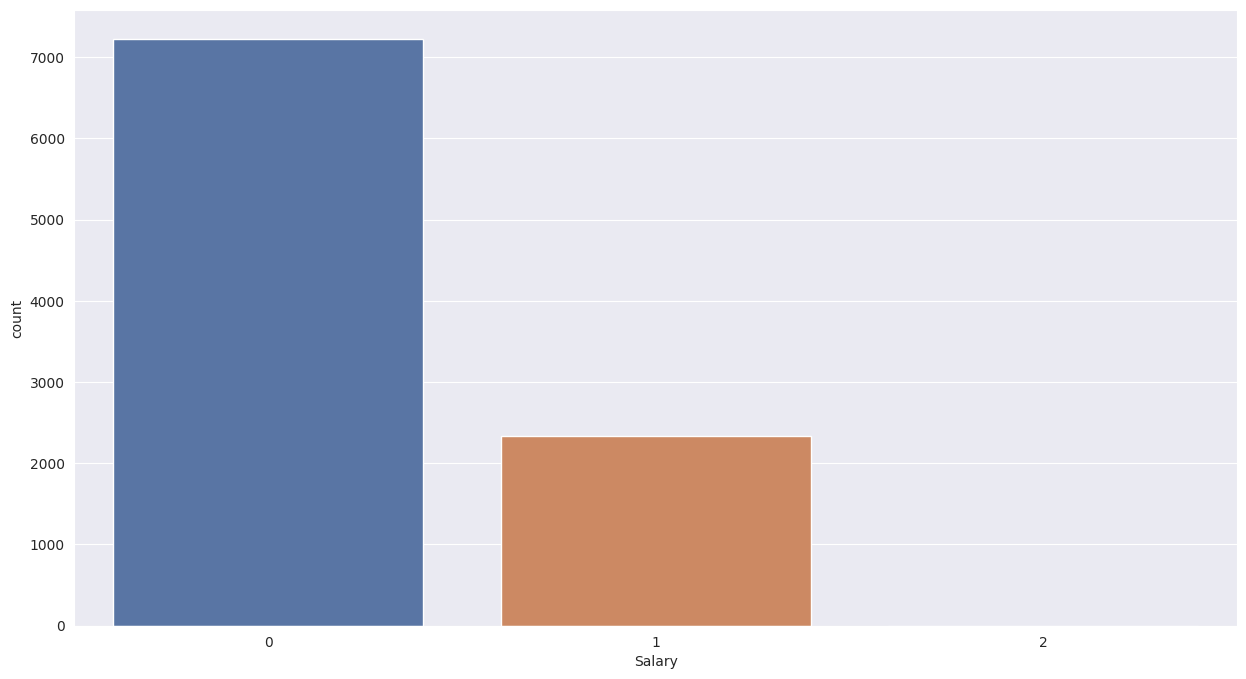

In [22]:
columns=['workclass','education','maritalstatus','occupation','relationship','race','sex','Salary']
sns.set({'figure.figsize':(15,8)})
for i in columns:
  plt.figure()
  print(i)
  print(sns.countplot(x=i,data=data_train))

In [23]:
data_train['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate',
       ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool',
       ' 12th', ' 1st-4th'], dtype=object)

<ipython-input-24-3bc8ed069cd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_train['capitalgain'])


<Axes: xlabel='capitalgain', ylabel='Density'>

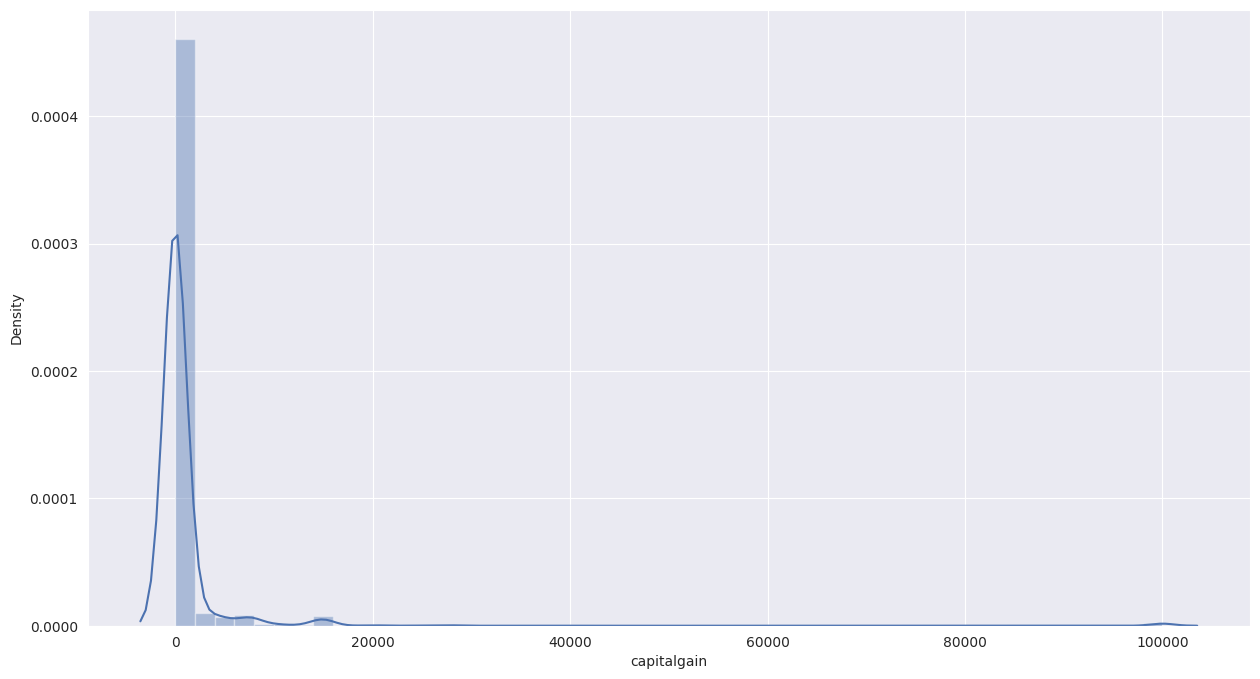

In [24]:
sns.distplot(data_train['capitalgain'])

In [25]:
columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
for i in columns:
  data_train[i]=le.fit_transform(data_train[i])
data_train

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,22,5,9,12,4,0,1,4,1,18,0,39,37,0
1,33,4,9,12,2,3,0,4,1,0,0,12,37,0
2,21,2,11,8,0,5,1,4,1,0,0,39,37,0
3,36,2,1,6,2,5,0,2,1,0,0,39,37,0
4,11,2,9,12,2,9,5,2,0,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9554,26,2,9,12,2,0,0,1,1,0,0,39,38,0
9555,1,5,1,6,4,7,3,4,1,0,0,19,37,0
9556,37,2,11,8,2,7,0,4,1,0,0,49,37,0
9557,45,2,11,8,4,7,2,2,0,0,0,37,37,0


In [26]:
columns=['age', 'workclass', 'education', 'educationno', 'maritalstatus',
       'occupation', 'relationship', 'race', 'sex', 'capitalgain',
       'capitalloss', 'hoursperweek', 'native']
for i in columns:
  data_test[i]=le.fit_transform(data_test[i])
  data_test

In [27]:
x_train1=data_train.iloc[:,:-1]
y_train1=data_train.iloc[:,-1]

In [28]:
x_test1=data_test.iloc[:,:-1]
y_test1=data_test.iloc[:,-1]

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x_train1,y_train1,test_size=0.2)

In [30]:
model=SVC(kernel='linear',C=0.01,gamma=0.1)
model.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1, kernel='linear')

In [31]:
y_predict_train=model.predict(x_train)

In [32]:
model.score(x_train,y_train)

0.8018830914083954

In [33]:
y_pred_test=model.predict(x_test)

In [34]:
accuracy=accuracy_score(y_test,y_pred_test)
accuracy

0.8043933054393305

In [42]:
new_pred=model.predict(x_test1)
new_pred

array([0, 0, 0, ..., 0, 0, 1])

Hyperparameter tuning

In [36]:
model_rbf=SVC(kernel='rbf',C=0.01,gamma=0.1)
model_rbf.fit(x_train1,y_train1)

SVC(C=0.01, gamma=0.1)

In [40]:
y_pre=model_rbf.predict(x_train)
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [41]:
y_pre=model.predict(x_test)
y_pre

array([0, 0, 0, ..., 0, 0, 0])

In [39]:
accuracy_score(y_test,y_pre)

0.8043933054393305